# Final Model: Gauss Markov conditions testing
Using code from https://jeffmacaluso.github.io//post/LinearRegressionAssumptions/ for the testing of the conditions.

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split  
from sklearn import metrics  
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing




## Load Datasets

In [2]:
Net_Migration = pd.read_csv('Net_Migration.csv', sep= ",")
Immigration = pd.read_csv('Immigration.csv', sep= ",")
Emigration = pd.read_csv('Emigration.csv', sep= ",")

## Net_Migration

In [3]:
Net_Migration

,Unnamed: 0,Year,Migration Percentage of Population,T-1 Net migration 25-44 years,T-1 Enterprises_Ireland_250+,T-1 General Surplus/Deficit (Million Euros),T-1 Trade Volume Index Imports (Base 2010),T-1 Housing_CPI,T-1 Trade Volume Index Exports (Base 2010),T-1 Unemployment rate_Ireland_Total_Foreign-born,T-1 Emigrants 15-24 years,T-1 Emigrants_EU15 to EU27,T-1 South Asia Percentage Change,T-1 Migration Percentage of Population,T-1 Crisis Indicator,Events_Positive_Impact,Events_Negative_Impact,Events_Impact
0,0,1952.0,NaN,NaN,NaN,NaN,4.6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,1,1953.0,NaN,NaN,NaN,NaN,3.9,NaN,1.2,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2,1954.0,NaN,NaN,NaN,NaN,4.4,NaN,1.3,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,3,1955.0,NaN,NaN,NaN,NaN,4.3,NaN,1.4,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,4,1956.0,NaN,NaN,NaN,NaN,4.8,NaN,1.3,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,2021.0,0.433127,16666.666667,666.0,-18704.0,194.4,-1.008333,188.6,7.5,10266.666667,7900.0,1.124469,0.896621,2,0,0,0
70,70,2022.0,1.008354,13066.666667,NaN,-6565.0,214.5,5.650000,191.3,7.5,12733.333333,4400.0,1.029464,0.433127,1,1,0,1
71,71,2023.0,NaN,21466.666667,NaN,8635.0,275.2,20.483333,233.9,4.9,14033.333333,5000.0,0.916783,1.008354,0,0,0,0
72,72,2024.0,NaN,NaN,NaN,8328.0,NaN,NaN,NaN,NaN,NaN,8800.0,NaN,NaN,0,0,0,0


In [4]:
Net_Migration.head()

,Unnamed: 0,Year,Migration Percentage of Population,T-1 Net migration 25-44 years,T-1 Enterprises_Ireland_250+,T-1 General Surplus/Deficit (Million Euros),T-1 Trade Volume Index Imports (Base 2010),T-1 Housing_CPI,T-1 Trade Volume Index Exports (Base 2010),T-1 Unemployment rate_Ireland_Total_Foreign-born,T-1 Emigrants 15-24 years,T-1 Emigrants_EU15 to EU27,T-1 South Asia Percentage Change,T-1 Migration Percentage of Population,T-1 Crisis Indicator,Events_Positive_Impact,Events_Negative_Impact,Events_Impact
0,0,1952.0,NaN,NaN,NaN,NaN,4.6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,1,1953.0,NaN,NaN,NaN,NaN,3.9,NaN,1.2,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2,1954.0,NaN,NaN,NaN,NaN,4.4,NaN,1.3,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,3,1955.0,NaN,NaN,NaN,NaN,4.3,NaN,1.4,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,4,1956.0,NaN,NaN,NaN,NaN,4.8,NaN,1.3,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [5]:
# remove first 9 rows of dataframe
Net_Migration.drop(Net_Migration.index[72:74], inplace=True)
Net_Migration.drop(Net_Migration.index[:9], inplace=True)

# remove .0 from 'Year' column
Net_Migration['Year'] = Net_Migration['Year'].astype(str).str[:-2].astype(int)

# Set 'Year' as the index
Net_Migration.set_index('Year', inplace=True)

Net_Migration.tail()

,Unnamed: 0,Migration Percentage of Population,T-1 Net migration 25-44 years,T-1 Enterprises_Ireland_250+,T-1 General Surplus/Deficit (Million Euros),T-1 Trade Volume Index Imports (Base 2010),T-1 Housing_CPI,T-1 Trade Volume Index Exports (Base 2010),T-1 Unemployment rate_Ireland_Total_Foreign-born,T-1 Emigrants 15-24 years,T-1 Emigrants_EU15 to EU27,T-1 South Asia Percentage Change,T-1 Migration Percentage of Population,T-1 Crisis Indicator,Events_Positive_Impact,Events_Negative_Impact,Events_Impact
Year,,,,,,,,,,,,,,,,,
2019,67,0.891710,12600.000000,657.0,437.0,189.2,5.100000,156.2,7.2,7866.666667,6000.0,1.187652,0.912207,0,0,0,0
2020,68,0.896621,15333.333333,732.0,1695.0,192.7,3.766667,168.5,5.9,11466.666667,3700.0,1.144473,0.891710,0,0,1,1
2021,69,0.433127,16666.666667,666.0,-18704.0,194.4,-1.008333,188.6,7.5,10266.666667,7900.0,1.124469,0.896621,2,0,0,0
2022,70,1.008354,13066.666667,NaN,-6565.0,214.5,5.650000,191.3,7.5,12733.333333,4400.0,1.029464,0.433127,1,1,0,1
2023,71,NaN,21466.666667,NaN,8635.0,275.2,20.483333,233.9,4.9,14033.333333,5000.0,0.916783,1.008354,0,0,0,0


In [6]:
# make loop to check which year data starts for each variable
for i in range(0, len(Net_Migration.columns)):
    print(Net_Migration.columns[i], ", ", Net_Migration.iloc[:,i].first_valid_index())


Unnamed: 0 ,  1961
Migration Percentage of Population ,  1961
T-1 Net migration 25-44 years ,  2003
T-1 Enterprises_Ireland_250+ ,  2009
T-1 General Surplus/Deficit (Million Euros) ,  1996
T-1 Trade Volume Index Imports (Base 2010) ,  1961
T-1 Housing_CPI ,  1998
T-1 Trade Volume Index Exports (Base 2010) ,  1961
T-1 Unemployment rate_Ireland_Total_Foreign-born ,  2001
T-1 Emigrants 15-24 years ,  1988
T-1 Emigrants_EU15 to EU27 ,  2006
T-1 South Asia Percentage Change ,  1962
T-1 Migration Percentage of Population ,  1961
T-1 Crisis Indicator ,  1961
Events_Positive_Impact ,  1961
Events_Negative_Impact ,  1961
Events_Impact ,  1961


## Check multicorrelation all variables

high multicorrelation related to all variables in dataframe Net Migration

In [7]:
# Drop rows with missing values
X = Net_Migration[['T-1 Net migration 25-44 years', 
                   'T-1 Enterprises_Ireland_250+',
                   'T-1 General Surplus/Deficit (Million Euros)',
                   'T-1 Trade Volume Index Imports (Base 2010)',
                   'T-1 Housing_CPI',
                   'T-1 Trade Volume Index Exports (Base 2010)',
                   'T-1 Unemployment rate_Ireland_Total_Foreign-born',
                   'T-1 Emigrants 15-24 years',
                   'T-1 Emigrants_EU15 to EU27',
                   'T-1 South Asia Percentage Change',
                   'T-1 Migration Percentage of Population',
                   'T-1 Crisis Indicator'
                   ]]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif_data

,feature,VIF
0,T-1 Net migration 25-44 years,183.799849
1,T-1 Enterprises_Ireland_250+,5077.580386
2,T-1 General Surplus/Deficit (Million Euros),213.700714
3,T-1 Trade Volume Index Imports (Base 2010),30255.847120
4,T-1 Housing_CPI,17.073516
5,T-1 Trade Volume Index Exports (Base 2010),14994.485807
6,T-1 Unemployment rate_Ireland_Total_Foreign-born,5021.595815
7,T-1 Emigrants 15-24 years,3015.359632
8,T-1 Emigrants_EU15 to EU27,159.144990
9,T-1 South Asia Percentage Change,22270.295267


## Checking for multicorrelation different migration variables

In [8]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Net migration 25-44 years', 'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Net migration 25-44 years']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 Emigrants 15-24 years', 'T-1 Net migration 25-44 years', 'T-1 Emigrants_EU15 to EU27']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                  feature        VIF
0  T-1 Migration Percentage of Population  18.501472
1           T-1 Net migration 25-44 years  22.158589
2               T-1 Emigrants 15-24 years  12.855338
3              T-1 Emigrants_EU15 to EU27  12.340205
                                  feature        VIF
0  T-1 Migration Percentage of Population  11.043816
1           T-1 Net migration 25-44 years  11.043816
                         feature       VIF
0      T-1 Emigrants 15-24 years  7.746485
1  T-1 Net migration 25-44 years  1.460832
2     T-1 Emigrants_EU15 to EU27  6.806796
                                  feature       VIF
0  T-1 Migration Percentage of Population  1.219732
1               T-1 Emigrants 15-24 years  6.237245
2              T-1 Emigrants_EU15 to EU27  5.729191


## Check for multicorrelation with trading variables

In [9]:
# Drop rows with missing values
X = Net_Migration[['T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Exports (Base 2010)','T-1 Trade Volume Index Imports (Base 2010)' ]]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Exports (Base 2010)' ]]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# Drop rows with missing values
X = Net_Migration[['T-1 General Surplus/Deficit (Million Euros)', 'T-1 Trade Volume Index Imports (Base 2010)' ]]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature         VIF
0  T-1 General Surplus/Deficit (Million Euros)    1.445117
1   T-1 Trade Volume Index Exports (Base 2010)  202.282418
2   T-1 Trade Volume Index Imports (Base 2010)  196.845912
                                       feature       VIF
0  T-1 General Surplus/Deficit (Million Euros)  1.151946
1   T-1 Trade Volume Index Exports (Base 2010)  1.151946
                                       feature       VIF
0  T-1 General Surplus/Deficit (Million Euros)  1.120986
1   T-1 Trade Volume Index Imports (Base 2010)  1.120986


## Correlation Matrix

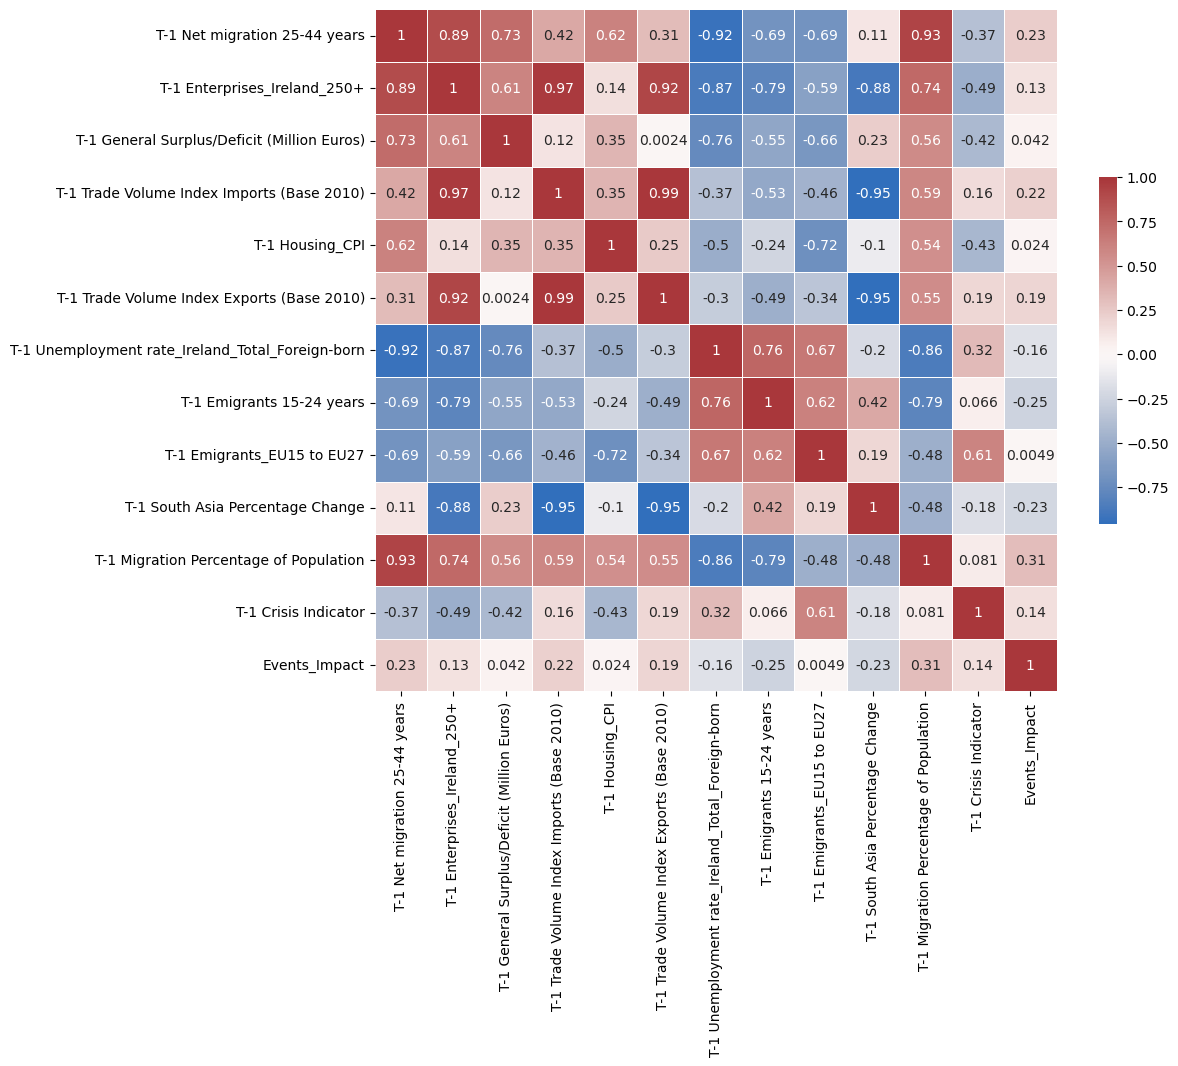

In [10]:
X = Net_Migration[['T-1 Net migration 25-44 years', 
                   'T-1 Enterprises_Ireland_250+',
                   'T-1 General Surplus/Deficit (Million Euros)',
                   'T-1 Trade Volume Index Imports (Base 2010)',
                   'T-1 Housing_CPI',
                   'T-1 Trade Volume Index Exports (Base 2010)',
                   'T-1 Unemployment rate_Ireland_Total_Foreign-born',
                   'T-1 Emigrants 15-24 years',
                   'T-1 Emigrants_EU15 to EU27',
                   'T-1 South Asia Percentage Change',
                   'T-1 Migration Percentage of Population',
                   'T-1 Crisis Indicator',
                   'Events_Impact'
                   ]]

# correlation matrix 
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio and show correlation values
sns.heatmap(corr, cmap='vlag', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


plt.show()

## Simple Modelling without Extra Variables

In [73]:
migration_indexed = Net_Migration[['Migration Percentage of Population']]

## Simple OLS with t-1 migration and surplus/deficit, including Crisis indicator

In [12]:
Net_Migration.columns

Index(['Unnamed: 0', 'Migration Percentage of Population',
       'T-1 Net migration 25-44 years', 'T-1 Enterprises_Ireland_250+',
       'T-1 General Surplus/Deficit (Million Euros)',
       'T-1 Trade Volume Index Imports (Base 2010)', 'T-1 Housing_CPI',
       'T-1 Trade Volume Index Exports (Base 2010)',
       'T-1 Unemployment rate_Ireland_Total_Foreign-born',
       'T-1 Emigrants 15-24 years', 'T-1 Emigrants_EU15 to EU27',
       'T-1 South Asia Percentage Change',
       'T-1 Migration Percentage of Population', 'T-1 Crisis Indicator',
       'Events_Positive_Impact', 'Events_Negative_Impact', 'Events_Impact'],
      dtype='object')

In [13]:
# Drop rows with missing values
X = Net_Migration[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']]
X = X.dropna()

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                       feature       VIF
0       T-1 Migration Percentage of Population  1.479325
1  T-1 General Surplus/Deficit (Million Euros)  1.825490
2                         T-1 Crisis Indicator  2.071208


In [30]:
Net_Migration_na = Net_Migration[['Migration Percentage of Population', 'T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']].dropna()
X = Net_Migration_na[['T-1 Migration Percentage of Population', 'T-1 General Surplus/Deficit (Million Euros)','T-1 Crisis Indicator']]
y = Net_Migration_na['Migration Percentage of Population']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

final_model = model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.830
Model:                                            OLS   Adj. R-squared:                  0.800
Method:                                 Least Squares   F-statistic:                     27.74
Date:                                Wed, 10 Jul 2024   Prob (F-statistic):           8.91e-07
Time:                                        09:59:29   Log-Likelihood:                -5.6220
No. Observations:                                  21   AIC:                             19.24
Df Residuals:                                      17   BIC:                             23.42
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5775      0.144      4.013      0.001       0.274       0.881
T-1 Migration Percentage of Population          0.6069      0.122      4.994      0.000       0.351       0.863
T-1 General Surplus/Deficit (Million Euros)   1.65e-05   7.34e-06      2.249      0.038    1.02e-06     3.2e-05
T-1 Crisis Indicator                           -0.2194      0.085     -2.569      0.020      -0.400      -0.039
==============================================================================
Omnibus:                        1.822   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.095
Skew:                           0.559   Prob(JB):                        0.578
Kurtosis:                       2.950   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Assuming 'migration_indexed' has a datetime index
index = Net_Migration_na.index

# Predict using the model and specify the index
y_pred = model.predict(sm.add_constant(X_test))
# y_pred = model.predict(start=split_index, end=len(Net_Migration_na)-1, typ='levels', index=index[split_index:])

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).dropna()  
print(comparison)

# Extract the filtered y_test and y_pred
y_test_filtered = comparison['Actual']
y_pred_filtered = comparison['Predicted']


        Actual  Predicted
Year                     
2017  0.815412   0.749921
2018  0.912207   1.058117
2019  0.891710   1.138317
2020  0.896621   1.146637
2021  0.433127   0.374288
2022  1.008354   0.512655


In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 0.21042676071031877
MSE: 0.06634671765241053
RMSE: 0.2575785659801889


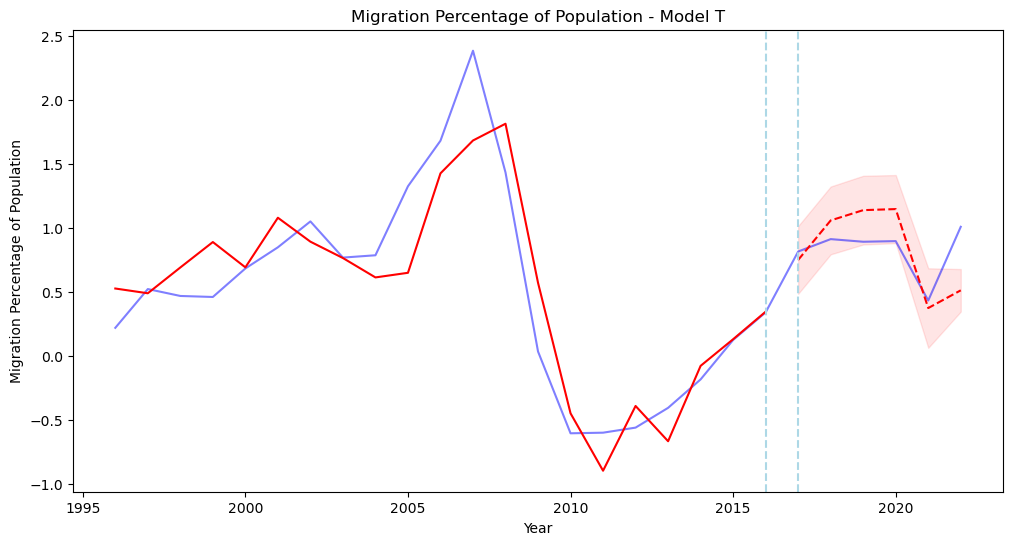

In [17]:
# plot data with 95% confidence interval
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred


# calculate the confidence intervals
X_test_with_const = sm.add_constant(X_test)
predictions = model.get_prediction(X_test_with_const)
confidence_intervals = predictions.conf_int(alpha=0.05)
lower_bounds = confidence_intervals[:, 0]
upper_bounds = confidence_intervals[:, 1]

# plot
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# Plotting the predicted values and confidence intervals for the test set
plt.fill_between(X_test_with_const.index, lower_bounds, upper_bounds, color='red', alpha=0.1, label='95% CI')


# add line at split_index
plt.axvline(x=2016, color='lightblue', linestyle='--')
plt.axvline(x=2017, color='lightblue', linestyle='--')

plt.title('Migration Percentage of Population - Model T')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

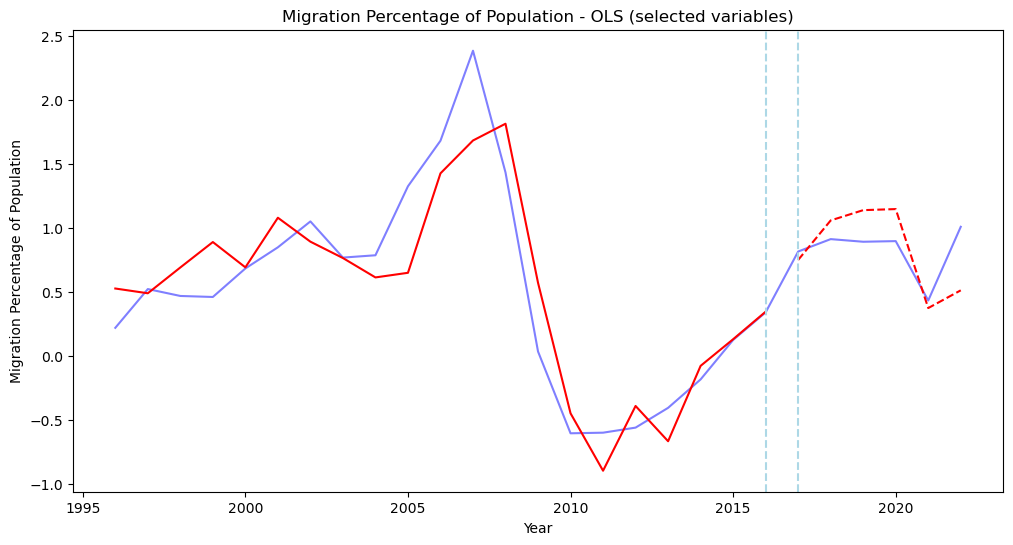

In [18]:
# plot data
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred

plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# add line at split_index
plt.axvline(x=2016, color='lightblue', linestyle='--')
plt.axvline(x=2017, color='lightblue', linestyle='--')

plt.title('Migration Percentage of Population - OLS (selected variables)')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

In [19]:
X_test

,T-1 Migration Percentage of Population,T-1 General Surplus/Deficit (Million Euros),T-1 Crisis Indicator
Year,,,
2017,0.340670,-2079.0,0
2018,0.815412,-863.0,0
2019,0.912207,437.0,0
2020,0.891710,1695.0,0
2021,0.896621,-18704.0,2
2022,0.433127,-6565.0,1


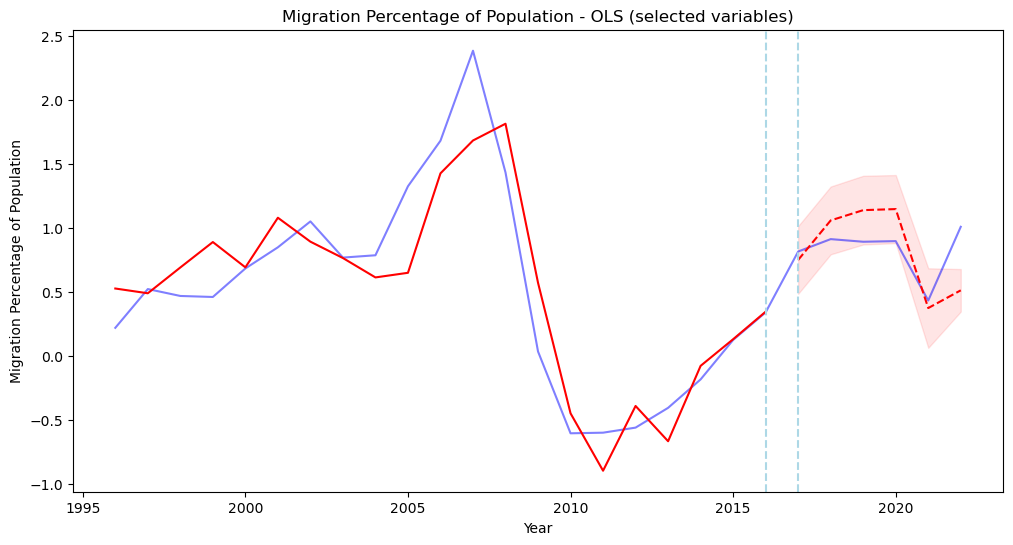

In [20]:
# plot data with 95% confidence interval
Net_Migration_na['fitted_values'] = model.fittedvalues
Net_Migration_na['predicted_values']  = y_pred


# calculate the confidence intervals
X_test_with_const = sm.add_constant(X_test)
predictions = model.get_prediction(X_test_with_const)
confidence_intervals = predictions.conf_int(alpha=0.05)
lower_bounds = confidence_intervals[:, 0]
upper_bounds = confidence_intervals[:, 1]

# plot
plt.figure(figsize=(12,6))
plt.plot(Net_Migration_na['Migration Percentage of Population'], color='blue', alpha=0.5)
plt.plot(Net_Migration_na['fitted_values'], color='red')
plt.plot(Net_Migration_na['predicted_values'], color='red', linestyle='dashed')

# Plotting the predicted values and confidence intervals for the test set
plt.fill_between(X_test_with_const.index, lower_bounds, upper_bounds, color='red', alpha=0.1, label='95% CI')


# add line at split_index
plt.axvline(x=2016, color='lightblue', linestyle='--')
plt.axvline(x=2017, color='lightblue', linestyle='--')

plt.title('Migration Percentage of Population - OLS (selected variables)')
plt.xlabel('Year')
plt.ylabel('Migration Percentage of Population')

plt.show()

## Final Model (Model T)

In [21]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Migration Percentage of Population   R-squared:                       0.830
Model:                                            OLS   Adj. R-squared:                  0.800
Method:                                 Least Squares   F-statistic:                     27.74
Date:                                Wed, 10 Jul 2024   Prob (F-statistic):           8.91e-07
Time:                                        09:54:55   Log-Likelihood:                -5.6220
No. Observations:                                  21   AIC:                             19.24
Df Residuals:                                      17   BIC:                             23.42
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5775      0.144      4.013      0.001       0.274       0.881
T-1 Migration Percentage of Population          0.6069      0.122      4.994      0.000       0.351       0.863
T-1 General Surplus/Deficit (Million Euros)   1.65e-05   7.34e-06      2.249      0.038    1.02e-06     3.2e-05
T-1 Crisis Indicator                           -0.2194      0.085     -2.569      0.020      -0.400      -0.039
==============================================================================
Omnibus:                        1.822   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.095
Skew:                           0.559   Prob(JB):                        0.578
Kurtosis:                       2.950   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Testing

## Assumption 1: Linear Relationship between the Target and the Feature 

In [ ]:
X
y

X_test
X_train

y_test
y_train

In [34]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(sm.add_constant(features))
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [45]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


c:\Users\joosl\Downloads\Applications\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


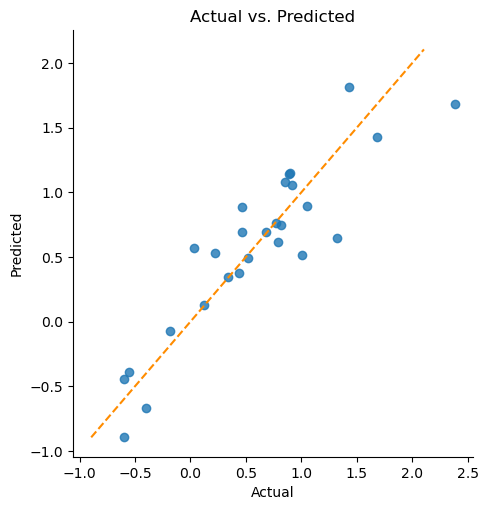

In [46]:
linear_assumption(final_model, X, y)

## Assumption 2: The error terms are normally distributed 

In [47]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.17324117811214795
Residuals are normally distributed


C:\Users\joosl\AppData\Local\Temp\ipykernel_20256\965784447.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


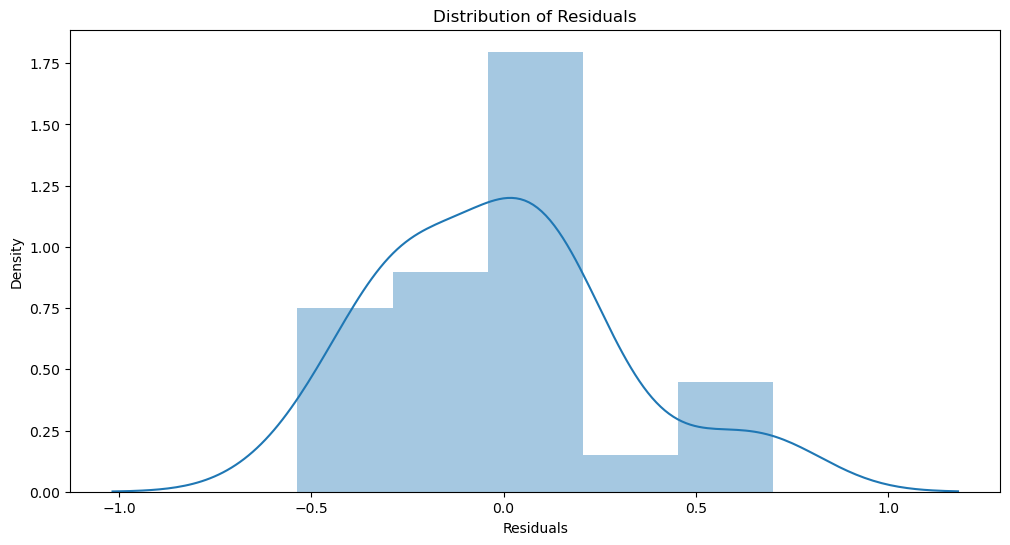


Assumption satisfied


In [48]:
normal_errors_assumption(final_model, X, y)

## Assumption 3: Little to no multicollinearity among predictors

In [49]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [54]:
# get names from X
feature_names = X.columns

Assumption 3: Little to no multicollinearity among predictors


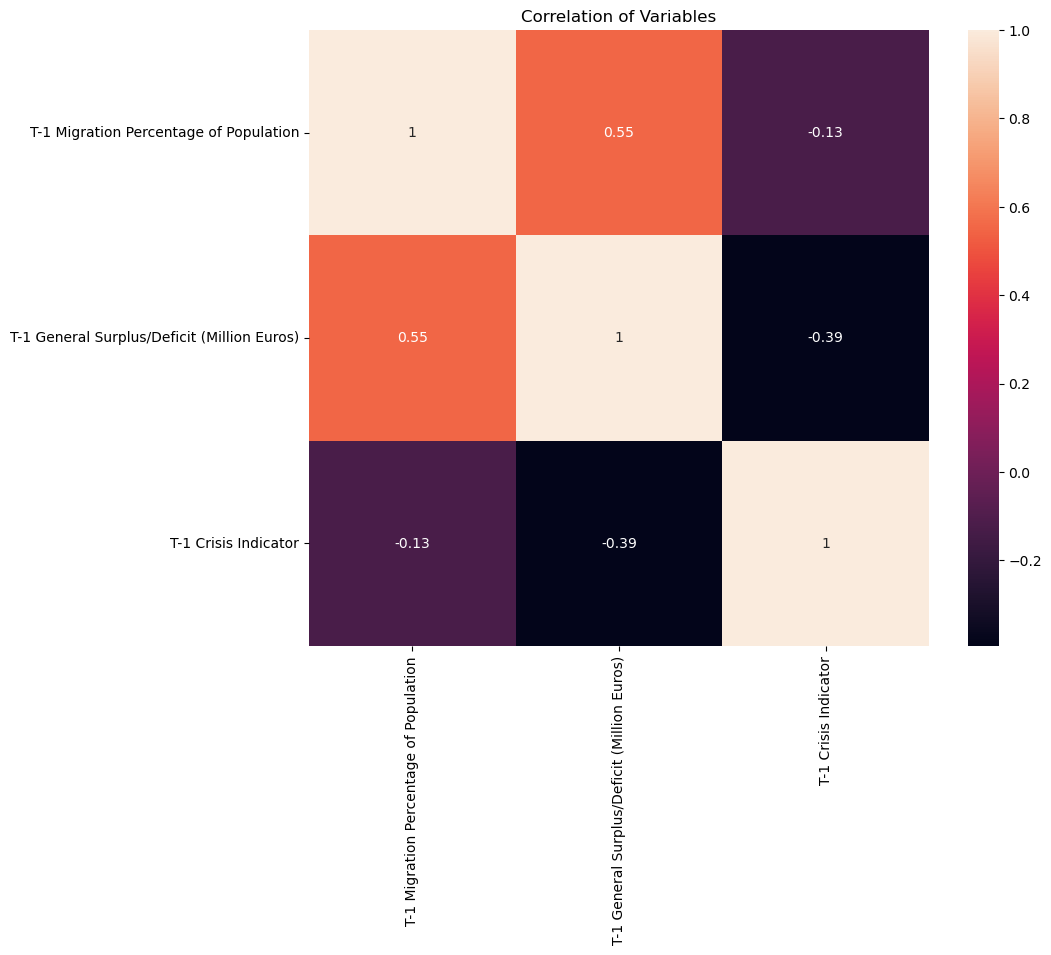

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
T-1 Migration Percentage of Population: 1.4626902217974886
T-1 General Surplus/Deficit (Million Euros): 1.8024324671144016
T-1 Crisis Indicator: 2.074145695217641

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [55]:
multicollinearity_assumption(final_model, X, y, feature_names)

## Assumption 4: No Autocorrelation 

In [56]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')


In [57]:
autocorrelation_assumption(final_model, X, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.6215872074114566
Little to no autocorrelation 

Assumption satisfied


## Assumption 5: Homoscedasticity of Error Terms 


In [71]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    # start x at 1950 and finish at 2050
    ax.set_xlim(1995, 2023)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


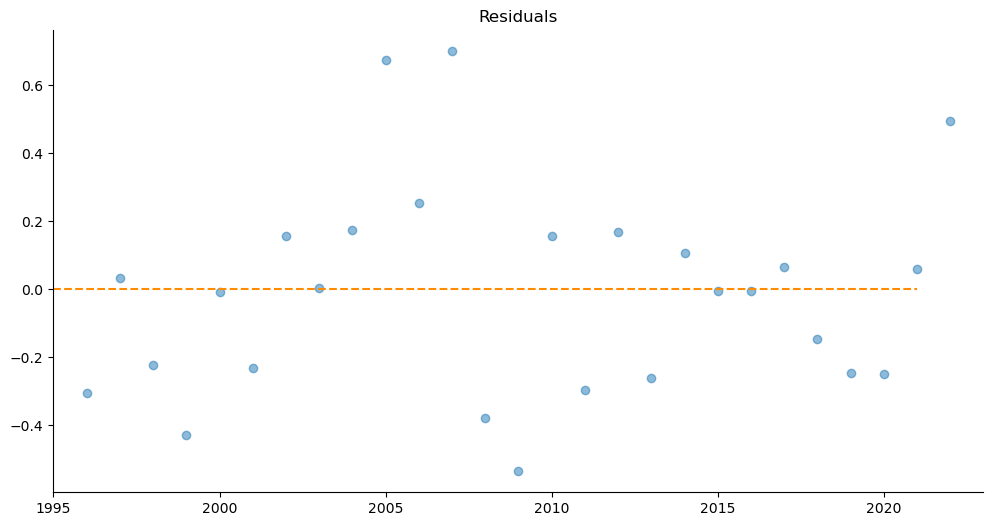

In [72]:
homoscedasticity_assumption(final_model, X, y)
